In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Training**

In [2]:
# Importing Training Data 
TrainingData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-train.csv")
TrainingData

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = np.array(TrainingData.drop('23', axis=1))
print('X Shape : ', X.shape)
print(X)

X Shape :  (88799, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
Y = np.array([TrainingData['23']]).T
print('Y Shape : ', Y.shape)
print(Y)

Y Shape :  (88799, 1)
[[ 7]
 [16]
 [15]
 ...
 [ 1]
 [23]
 [12]]


In [5]:
m = X.shape[0]
print('m =', m)

m = 88799


In [6]:
Classes = np.unique(Y)
print('Classes :\n', Classes)
Y_HotOne = np.zeros((m, len(Classes)))
for i in range(0, m):
  Y_HotOne[i][Y[i]-1] = 1
print('Y_HotOne encoding :\n', Y_HotOne)

Classes :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Y_HotOne encoding :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
X = np.concatenate( (np.ones((m,1)), X), axis=1 )
print('X Shape : ', X.shape)
print(X)

X Shape :  (88799, 785)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [8]:
def Sigmoid(X):
    return 1/(1 + np.exp(-X))

In [9]:
LayerSizes = [784, 200, 26]

In [10]:
Weights = {
        'W1' : np.random.rand(LayerSizes[1], LayerSizes[0]+1),
        'W2' : np.random.rand(LayerSizes[2], LayerSizes[1]+1)
    }

In [11]:
print(Weights['W1'])

[[0.08995144 0.56172019 0.36761201 ... 0.74356795 0.28849234 0.24730025]
 [0.57563998 0.38043965 0.80086343 ... 0.69733133 0.11657009 0.99092269]
 [0.82731053 0.77552891 0.49853297 ... 0.3330148  0.00964945 0.60376517]
 ...
 [0.60825265 0.34960186 0.71100888 ... 0.2231472  0.26918865 0.6846728 ]
 [0.62885662 0.3952729  0.24151375 ... 0.76008389 0.88898494 0.35597045]
 [0.8418986  0.30597015 0.40374411 ... 0.62665117 0.51769141 0.48113347]]


In [12]:
print(Weights['W2'])

[[0.71397802 0.94888662 0.14157053 ... 0.56500818 0.96842554 0.97197715]
 [0.52683053 0.38515028 0.29058987 ... 0.97767556 0.52587777 0.58773136]
 [0.55324483 0.54912614 0.2900017  ... 0.79192276 0.45762661 0.64200907]
 ...
 [0.14739113 0.32396269 0.4120495  ... 0.44734131 0.89228786 0.65971002]
 [0.94380571 0.12329043 0.97457404 ... 0.44600335 0.06018189 0.92072049]
 [0.13490269 0.15920722 0.3300202  ... 0.46284652 0.55050625 0.20184541]]


In [13]:
def Cost(Output, Y):
  return -np.sum( (Y*np.log(Output) + (1-Y) * np.log(1-Output))/m )

In [14]:
def ForwardPropogation(X):
    Weights['A1'] = X

    Weights['Z2'] = np.dot(Weights['A1'], Weights["W1"].T)
    Weights['A2'] = Sigmoid(Weights['Z2'])
    Weights['A2'] = np.concatenate((np.ones((X.shape[0],1)), Weights['A2']), axis=1)

    Weights['Z3'] = np.dot(Weights['A2'], Weights["W2"].T)
    Weights['A3'] = Sigmoid(Weights['Z3'])

    return Weights['A3']

In [15]:
CostList = []

In [16]:
def BackwardPropogation(X, Y, LearningRate, Iterations):
    for i in range(Iterations):
      Output = ForwardPropogation(X)
      
      d3 = Weights['A3'] - Y

      d2 = (np.dot(d3,Weights['W2'])) * (Weights['A2'] * (1 - Weights['A2']))
      d2 = d2[:, 1:]

      d_W1 = np.dot(d2.T, Weights['A1'])/m
      Weights['W1'] = Weights['W1'] - LearningRate * d_W1

      d_W2 = np.dot(d3.T, Weights['A2'])/m
      Weights['W2'] = Weights['W2'] - LearningRate * d_W2
      
      CostList.append(Cost(Output, Y))

In [17]:
LearningRate = 0.1
Iterations   = 100

BackwardPropogation(X, Y_HotOne, LearningRate, Iterations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [18]:
print(CostList)

[nan, nan, nan, nan, 564.7338751037435, 95.59236125959778, 11.40981147854417, 10.724263225594648, 10.056640808420301, 9.40793089291207, 8.78074512690419, 8.17612503892852, 7.594842661380786, 7.039409553988427, 6.513098908201907, 6.021456650069826, 5.575243265516571, 5.187714914109089, 4.866106111249971, 4.612168397422017, 4.4280710353017625, 4.313151899850119, 4.25837717462488, 4.241746114778139, 4.23891058324895, 4.238620559994656, 4.238598314425772, 4.23859678079004, 4.238596678263016, 4.238596671461868, 4.238596671011416, 4.23859667098158, 4.238596670979604, 4.238596670979468, 4.238596670979458, 4.238596670979461, 4.238596670979464, 4.238596670979461, 4.2385966709794625, 4.23859667097946, 4.2385966709794625, 4.238596670979464, 4.2385966709794625, 4.238596670979462, 4.2385966709794625, 4.238596670979463, 4.2385966709794625, 4.238596670979462, 4.2385966709794625, 4.238596670979462, 4.238596670979462, 4.238596670979462, 4.238596670979462, 4.238596670979461, 4.238596670979461, 4.2385966

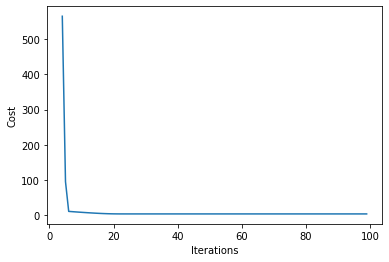

In [19]:
# Minimized Cost and Graph
rng = np.arange(0, len(CostList))
plt.plot(rng, CostList)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [20]:
print(Weights['W1'])

[[0.08995144 0.56172019 0.36761201 ... 0.74356795 0.28849234 0.24730025]
 [0.57563998 0.38043965 0.80086343 ... 0.69733133 0.11657009 0.99092269]
 [0.82731053 0.77552891 0.49853297 ... 0.3330148  0.00964945 0.60376517]
 ...
 [0.60825265 0.34960186 0.71100888 ... 0.2231472  0.26918865 0.6846728 ]
 [0.62885662 0.3952729  0.24151375 ... 0.76008389 0.88898494 0.35597045]
 [0.8418986  0.30597015 0.40374411 ... 0.62665117 0.51769141 0.48113347]]


In [21]:
print(Weights['W2'])

[[ 0.18043026  0.41533887 -0.39197723 ...  0.03146043  0.43487778
   0.4384294 ]
 [ 0.01233381 -0.12934644 -0.22390685 ...  0.46317884  0.01138106
   0.07323465]
 [ 0.06039079  0.0562721  -0.20285234 ...  0.29906872 -0.03522744
   0.14915503]
 ...
 [-0.37806162 -0.20149006 -0.11340325 ... -0.07811143  0.36683511
   0.13425728]
 [ 0.41926523 -0.40125005  0.45003356 ... -0.07853713 -0.46435859
   0.39618   ]
 [-0.37576016 -0.35145563 -0.18064265 ... -0.04781633  0.0398434
  -0.30881744]]


In [22]:
count = 0
Prediction = np.array([Weights['A3'].argmax(axis=1)]).T + 1

for i in range(m):
  if(Prediction[i] == Y[i]):
    count+=1

Accuracy = (count/m)*100
print('Accuracy : ', Accuracy, '%')

Accuracy :  3.888557303573238 %


# **Testing**

In [23]:
# Importing Testing Data 
TestingData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-test.csv")
TestingData

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_test = np.array(TestingData.drop('1', axis=1))
print('X_test Shape : ', X_test.shape)
print(X_test)

X_test Shape :  (14799, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
Y_test = np.array([TestingData['1']]).T
print('Y_test Shape : ', Y_test.shape)
print(Y_test)

Y_test Shape :  (14799, 1)
[[ 1]
 [ 1]
 [ 1]
 ...
 [19]
 [19]
 [19]]


In [26]:
m = X_test.shape[0]
print('m =', m)

m = 14799


In [27]:
X_test = np.concatenate( (np.ones((m,1)), X_test), axis=1 )
print('X_test Shape : ', X_test.shape)
print(X_test)

X_test Shape :  (14799, 785)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [28]:
Output = ForwardPropogation(X_test)

count = 0
Prediction = np.array([Output.argmax(axis=1)]).T + 1

for i in range(m):
  if(Prediction[i] == Y[i]):
    count+=1

Accuracy = (count/m)*100
print('Accuracy : ', Accuracy, '%')

Accuracy :  3.865126022028515 %
